In [8]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from PIL import Image

In [68]:
def Print_pic(C, s1, s2, d3):
    m = C[:,:,0].shape[0]
    if(d3):
        rgb = 3
        FC = np.zeros([s1,s2,3])
    else:
        rgb = 1
        FC = np.zeros([s1,s2])
    indx = 0
    for k in range(rgb):
        for i in range(s1//m):
            for j in range(s2//m):
                if(d3):
                    FC[i*m:(i+1)*m,j*m:(j+1)*m,k] = C[:,:,indx]
                else:
                    FC[i*m:(i+1)*m,j*m:(j+1)*m] = C[:,:,indx]
                indx += 1
    print(np.array(FC))
    #if(d3):
     #   im = Image.fromarray(FC[:,:,:].astype(np.uint8)).convert('RGB')
    #else:
     #   im = Image.fromarray(FC).convert('L')
    return np.array(FC)

In [69]:
file_name = 'coloredChips'
#Algorithm: M16, Esak
file_folder = 'Esak'
#Mode: CTR, CBC
mode = 'CTR'
#RGB: 1 - RGB; 0 - Grayscale
rgb_TF = 0

file = open(f'res/{mode}/{file_folder}/{file_name}', 'rb')
data, M1, s1, s2 = pickle.load(file)
file.close()

In [73]:
rgb_TF = 1
if(mode == 'CBC'):
    ans = Print_pic(data[:,:,1:], s1, s2, rgb_TF)
elif(mode == 'CTR'):
    ans = Print_pic(data[:,:,:], s1, s2, rgb_TF)

[[[ 43. 239. 200.]
  [  1. 232. 189.]
  [100. 153.  80.]
  ...
  [ 52.  15. 253.]
  [144. 211. 161.]
  [ 53.  40.   8.]]

 [[131. 149. 192.]
  [179.  40. 270.]
  [208. 249.  12.]
  ...
  [127.   5. 232.]
  [ 26.  81. 149.]
  [ 55. 275.  60.]]

 [[248. 198. 173.]
  [114.  81. 213.]
  [ 47. 141. 217.]
  ...
  [119. 104. 231.]
  [202.  30. 129.]
  [ 70. 225. 131.]]

 ...

 [[ 95. 126. 170.]
  [ 29. 180. 130.]
  [216. 261.  26.]
  ...
  [276. 147.  95.]
  [ 52. 107. 175.]
  [ 30. 250.  35.]]

 [[242. 205. 181.]
  [  0. 258. 110.]
  [ 10. 109. 190.]
  ...
  [ 32.   9. 139.]
  [182.  10. 109.]
  [ 46. 201. 107.]]

 [[ 54. 149. 168.]
  [176.  83.  70.]
  [263. 152. 260.]
  ...
  [240. 147. 134.]
  [ 23. 193.  20.]
  [ 68. 186. 109.]]]


281

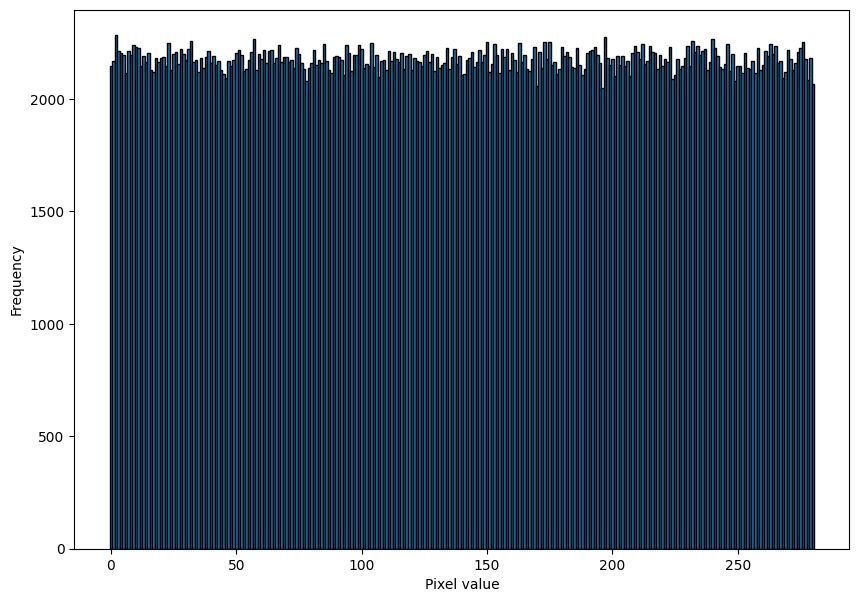

In [74]:
fig, ax = plt.subplots(figsize =(10, 7))
unique, counts = np.unique(np.array(ans), return_counts=True)
ax.bar(unique, counts,width=1,  edgecolor='black')
plt.xlabel('Pixel value')
plt.ylabel('Frequency')
len(unique)

In [66]:
len(unique)

256

In [75]:
ans.shape

(392, 520, 3)

<BarContainer object of 256 artists>

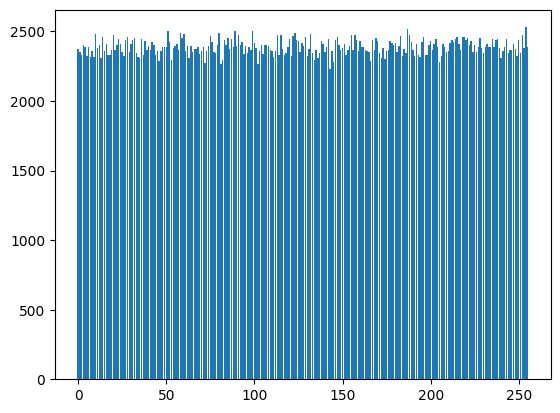

In [2]:
import matplotlib.pyplot as plt
import pickle

In [3]:
file = open(f'res/CTR_times', 'rb')
data1 = pickle.load(file)
file.close()
file = open(f'res/CBC_times', 'rb')
data2 = pickle.load(file)
file.close()

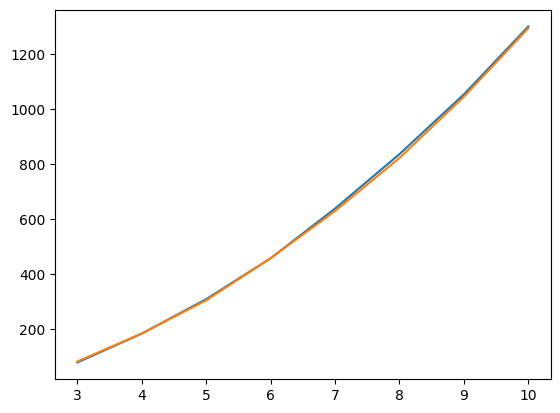

In [8]:
plt.plot(range(3,11),data1[0])
plt.plot(range(3,11),data2[0])

In [9]:
data1[0]

[78.61060920003801,
 183.6256273601204,
 309.0558571802452,
 457.8540426602587,
 638.7955304202624,
 836.8863412802108,
 1054.3271430201828,
 1301.3763145802543]

In [10]:
data2[0]

[82.28159261997789,
 184.21372579988093,
 304.9058301198296,
 457.98158999979495,
 629.5678792797029,
 822.9926861597226,
 1045.450689039752,
 1295.0034578598104]

In [26]:
def Comparison(List1, List2, labels):
    for i in range(len(List1)):
        file = open(f'res/{List1[i]}', 'rb')
        data1 = pickle.load(file)
        file.close()
        file = open(f'res/{List2[i]}', 'rb')
        data2 = pickle.load(file)
        file.close()
        plt.plot(range(3,11),data1[0])
        plt.plot(range(3,11),data2[0], label = labels[i])
    plt.legend()

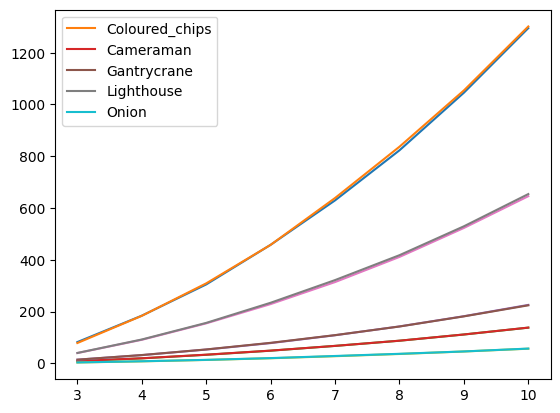

In [30]:
L1 = ['CBC_times','CBC_times_cameraman', 'CBC_times_gantrycrane','CBC_times_lighthouse','CBC_times_onion']
L2 = ['CTR_times','CTR_times_cameraman','CTR_times_gantrycrane','CTR_times_lighthouse','CTR_times_onion']
lbl = ['Coloured_chips','Cameraman','Gantrycrane','Lighthouse','Onion']
Comparison(L1,L2,lbl)

In [31]:
from modes import Form_pic_blocks 

In [ ]:
im = Image.open("images/lighthouse.png").convert('L')#Image.open("coloredChips.png")
X1 = np.asarray(im)
s1, s2, M1 = Form_pic_blocks(4, X1,1)
Nblocks = M1.shape[2]
Nblock